In [60]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import ipywidgets as widgets
from ipywidgets import interact, fixed, Dropdown, Checkbox, FloatSlider, IntSlider, Output, VBox, HBox

from numpy import cos, sin, tan, arctan, exp, log, pi, array, linspace, arange, sqrt
from numpy.linalg import norm
from mpl_toolkits import mplot3d
from ipykernel.pylab.backend_inline import flush_figures

%matplotlib widget

plt.rcParams['figure.figsize'] = [7.0, 7.0]


# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })


$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [61]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

<p style="padding-bottom:40%;"> </p>


# One-minute Review

The **partial derivative** of a function $f(x_1,\ldots,x_n)$ with respect to $x_i$ is $$\frac{\partial f}{\partial x_i}(x_1,\ldots,x_n) = \lim_{h\to 0} \frac{f(x_1,\ldots,x_{i-1},x_i+h,\ldots,x_n) - f(x_1,\ldots,x_n)}{h}.$$

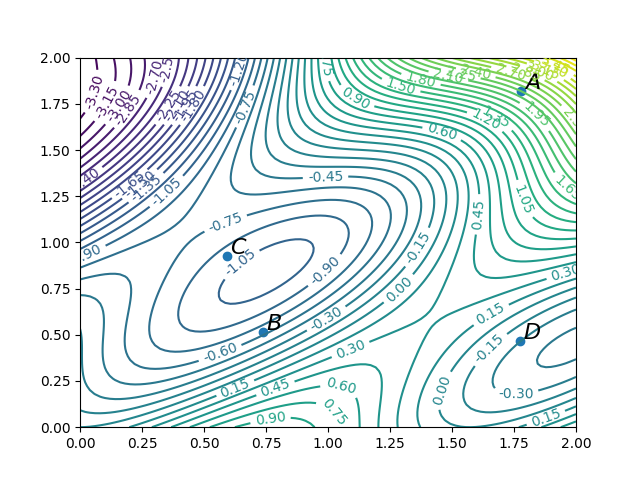

In [62]:
x = y = linspace(0,2,100)
x,y = meshgrid(x,y)
plt.figure("A contour plot")
c = plt.contour(x,y,x*y**2 - 2*y+ sin((x-y)*2)**2,levels=60);
np.random.seed(4323333)
xy = 2*np.random.random((4,2))
plt.scatter(xy[:,0],xy[:,1])
for i,uv in enumerate(xy):
    u,v = uv + array((.01,.01))
    plt.text(u,v,f'${"ABCD"[i]}$',fontsize=16)

plt.clabel(c,fmt="%.2f");
# plt.savefig('poll-9-1.png')

<p style="padding-bottom:40%;"> </p>


# Lecture 09 - Differentiability and Linearization

  - Objectives
    - Relate "differentiability" to linear functions.
    - Find the tangent plane to the graph of a function of two variables.
    - Use linearization and/or differentials to estimate quantities.
  
  - Resources
    - Content
      - Stewart: §14.4
      - New Strang: [§4.4](https://cnx.org/contents/oxzXkyFi@3.2:M_GqncFF@8/Tangent-Planes-and-Linear-Approximations)

    - Practice
      - Mooculus: [Tangent Planes](https://ximera.osu.edu/mooculus/calculus3/tangentPlanesAndDifferentiability/digInTangentPlanes)
    - Extras
      - CalcBLUE: [Tangent Spaces](https://www.youtube.com/watch?v=xDV2ikha320&index=64&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V) [Linearization](https://www.youtube.com/watch?v=Pb4VkLXTinU&index=70&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V)

<p style="padding-bottom:40%;"> </p>

## Linear Functions

A **linear function*** on $\RR^n$ has the form $$L(x_1, \ldots, x_n) = a_0 + \sum_{i=1}^n a_i x_i$$ where the $a_i$'s are constants. 

\*Really, "*affine* linear".


#### Note 

In two variables, linear functions have planar graphs. 

$$z = ax + by + c$$

<p style="padding-bottom:40%;"> </p>

# Differentiability

A function is differentiable at a point $(p_1, \ldots, p_n)$ if there exists a linear function $L$ such that $$f(\vec x) - L(\vec x) = \sum_{i=1}^n \epsilon_i(\vec x) (x_i - p_i)$$ where $\epsilon_i \to 0$ as $\vec x \to \vec p$.

#### Quick example

Show that $f(x) = x^3$ is differentiable at $x=1$.

In [63]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    t = slider.value
    x = linspace(0,2,100)
    
    pl = ax.plot(x,x**3 - t*(3*x - 2),x,(1-t)*(3*x -2))
    ax.set_ylim((-2,8))
    ax.grid(True)
    
    def update(change):
        t = slider.value
        pl[0].set_data(x,x**3 - t*(3*x - 2))
        pl[1].set_data(x,(1-t)*(3*x -2))
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A cubic example")

#### Solution

Let $L(x) = 3x-2$. Then $$f(x) - L(x) = x^3 - 3x + 2 = (x^2 + x - 2)(x-1)$$ and so $\epsilon(x) = x^2 + x - 2 \to 0 $ as $x\to 1$.

#### 
<p style="padding-bottom:40%;"> </p>

## Intuitively

In 1-D a function is differentiable if when 'zoomed in' its graph is well-approximated by a line. 

In [64]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=0.01, max=1, step=.01, value=1)
    drop = Dropdown(options={'smooth': lambda x: x**2/3+2/3, 'nonsmooth': lambda x: np.abs(x-1)/3 + x/2+1/2})
    
    t = slider.value
    func = drop.value
    
    x = np.linspace(1-t,1+t, 200)
    n = np.floor(np.log(t/4)/np.log(2))
    ax.set_xticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
    ax.set_yticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])

    ax.grid(True)
    pl = ax.plot(x,func(x),x,2/3*x +1/3)
    
    def update(change):
        t = slider.value
        func = drop.value

        x = np.linspace(1-t,1+t, 200)
        n = np.floor(np.log(t/4)/np.log(2))
        
        ax.set_xticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
        ax.set_yticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])

        pl[0].set_data(x,func(x))
        pl[1].set_data(x,2/3*x +1/3)
        
        ax.set_xlim(1-t, 1+t)
        ax.set_ylim(1-t, 1+t)
    
    slider.observe(update, names='value')
    drop.observe(update, names='value')
    
    return VBox([HBox([drop, slider]), fig.canvas])

a("1D Differentiability")

## Intuitively

In 2-D a function is differentiable if when 'zoomed in' its graph is well-approximated by a plane. 

In [65]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    slider = FloatSlider(min=0.01, max=1, step=.01, value=1)
    drop = Dropdown(options={'smooth': lambda x,y: x**2+y**2, 
                             'nonsmooth': lambda x,y: (2*np.abs(x-1) + 2*np.abs(y-1) + x + y)*exp(-(x-1)**2-(y-1)**2)})
    
    t = slider.value
    func = drop.value
    
    n = np.floor(np.log(t/4)/np.log(2))

    ax.set_xticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
    ax.set_yticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
    ax.set_zticks(ticks=np.arange(2-4*8*2**n,2+4*8*2**n,4*2**n),labels=[])
    
    x = y = np.linspace(1-t,1+t, 50)
    x,y = np.meshgrid(x,y)
    ax.plot_surface(x,y,func(x,y),alpha=.9, color='gray')
    if func(2,0) == 4:
        ax.plot_surface(x,y,2*x +2*y - 2, alpha = .5,zorder=0, color='r')

    ax.set_zlim(2 - 4*t,2 + 4*t)
    
    def update(change):
        while ax.collections:
            ax.collections.pop()
        
        t = slider.value
        func = drop.value

        n = np.floor(np.log(t/4)/np.log(2))
        
        ax.set_xticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
        ax.set_yticks(ticks=np.arange(1-8*2**n,1+8*2**n,2**n),labels=[])
        ax.set_zticks(ticks=np.arange(2-4*8*2**n,2+4*8*2**n,4*2**n),labels=[])

        x = y = np.linspace(1-t,1+t, 50)
        x,y = np.meshgrid(x,y)
        ax.plot_surface(x,y,func(x,y),alpha=.9, color='gray')
        if func(2,0) == 4:
            ax.plot_surface(x,y,2*x +2*y - 2, alpha = .5,zorder=0, color='r')

        ax.set_xlim(1-t, 1+t)
        ax.set_ylim(1-t, 1+t)
        ax.set_zlim(2 - 4*t,2 + 4*t)

    
    slider.observe(update, names='value')
    drop.observe(update, names='value')
    
    return VBox([HBox([drop, slider]), fig.canvas])

a("2D differentiability")

  - [Smooth example](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=graph&obj0_params_a=-2&obj0_params_b=2&obj0_params_c=-2&obj0_params_d=2&obj0_params_z=%28x%5E2+%2B+y%5E2%29%2F%281+%2B+x%5E2+%2B+y%5E2%29&obj0_params_tau=0&obj0_params_t0=0&obj0_params_t1=2) 
  - [Nonsmooth example](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=graph&obj0_params_a=0&obj0_params_b=2&obj0_params_c=0&obj0_params_d=2&obj0_params_z=%28abs%28x%29+%2B+abs%28y%29%29%2F%281+%2B+x%5E2+%2B+y%5E2%29&obj0_params_tau=0&obj0_params_t0=0&obj0_params_t1=2&obj1_kind=graph&obj1_params_a=-2&obj1_params_b=0&obj1_params_c=0&obj1_params_d=2&obj1_params_z=%28abs%28x%29+%2B+abs%28y%29%29%2F%281+%2B+x%5E2+%2B+y%5E2%29&obj1_params_tau=0&obj1_params_t0=0&obj1_params_t1=1&obj2_kind=graph&obj2_params_a=0&obj2_params_b=2&obj2_params_c=-2&obj2_params_d=0&obj2_params_z=%28abs%28x%29+%2B+abs%28y%29%29%2F%281+%2B+x%5E2+%2B+y%5E2%29&obj2_params_tau=0&obj2_params_t0=0&obj2_params_t1=1&obj3_kind=graph&obj3_params_a=-2&obj3_params_b=0&obj3_params_c=-2&obj3_params_d=0&obj3_params_z=%28abs%28x%29+%2B+abs%28y%29%29%2F%281+%2B+x%5E2+%2B+y%5E2%29&obj3_params_tau=0&obj3_params_t0=0&obj3_params_t1=1)

<p style="padding-bottom:40%;"> </p>

# The tangent plane

Let's find the tangent plane to the function $$f(x,y) = \ln(x+2y+1)$$ at the point $(1,1)$.

In [66]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    slider = IntSlider(min=0, max=5, value=0, description="stage")
    
    state = slider.value

    x = y = np.linspace(0,2,100)
    x,y = np.meshgrid(x,y)
    ax.plot_surface(x,y,log(x +2*y+1),alpha=.6)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlim(0,2)

    def update(change):
        ax.clear()
        
        ax.plot_surface(x,y,log(x +2*y+1),alpha=.6)

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlim(0,2)
        
        stage = slider.value

        if stage > 0:
            t = np.linspace(0,2,50)
            ax.plot(t,0*t+1,log(t+3),lw=3)
        if stage > 1:
            ax.quiver(1,1,log(4),1,0,1/4)
        if stage > 2:
            t = np.linspace(0,2,50)
            ax.plot(0*t+1,t,log(2*t+2),lw=3)
        if stage > 3:
            ax.quiver(1,1,log(4),0,1,2/4)
        if stage > 4:
            ax.quiver(1,1,log(4),-1/4,-1/2,1)
            ax.plot_surface(x,y,(x-1)/4 + (y-1)/2 + log(4),alpha=.3)

    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A tangent plane")


  1. Find the curve along the graph of $f$ "in the $x$-direction." $$ \vec r_1(t) = \begin{bmatrix} t \\ 1 \\ f(t,1)\end{bmatrix} = \begin{bmatrix} t \\ 1 \\ \ln(t+3)\end{bmatrix}$$

  2. Find its tangent vector $$ \vec r_1'(1) = \begin{bmatrix} 1 \\ 0 \\ f_x(1,1)\end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ \frac14\end{bmatrix}$$

  3. Find the curve along the graph of $f$ "in the $y$-direction." $$ \vec r_2(t) = \begin{bmatrix} 1 \\ t \\ f(1,t)\end{bmatrix} = \begin{bmatrix} 1 \\ t \\ \ln(2t+2)\end{bmatrix}$$

  4. Find its tangent vector $$ \vec r_2'(1) = \begin{bmatrix} 0 \\ 1 \\ f_y(1,1)\end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ \frac12\end{bmatrix}$$

  5. Cross them to find the normal to the tangent plane.

$$\langle 1,0, 1/4\rangle \times \langle 0,1,1/2 \rangle = \langle -1/4, -1/2,1 \rangle $$

<p style="padding-bottom:40%;"> </p>

## Tangent Plane

<div class="alert alert-block alert-info shadow"> The normal vector to the graph $z=f(x,y)$ of a smooth function at the point $(a,b,f(a,b))$ is 
\begin{align*} \vec n &= \langle 1,0,f_x(a,b) \rangle \times \langle 0,1,f_y(a,b) \rangle \\ &= \langle -f_x(a,b),-f_y(a,b),1 \rangle.
\end{align*}
</div>

<p style="padding-bottom:40%;"> </p>

Thus, the tangent plane has equation $$z = f(a,b) + f_x(a,b)(x-a) + f_y(a,b)(y-b).$$

The RHS is called the **linearization** of $f$ at (or "around") the point $(a,b)$.

<p style="padding-bottom:40%;"> </p>

## Linearization

It is often useful to use the linearization of a function to estimate its values nearby. The point being the *error* (really, those $\epsilon$'s above) is small. 

<div class="alert alert-block alert-info shadow"> 
<strong>Definition</strong>
The lineariztion of a function $f$ at $\vec p = \langle p_1, \ldots, p_n \rangle$ is a linear function

$$L(\vec x) = f(\vec p) + \sum_{i=1}^n \frac{\partial f}{\partial x_i}(\vec p)(x_i - p_i)$$
</div>


<p style="padding-bottom:40%;"> </p>

### Differentials 

It is sometimes convenient to use the language of **differentials** when estimating the change in a functions output. 

$$\Delta z = f(x,y) - f(a,b) \approx df = f_x dx + f_y dy$$ where the derivatives are taken at the appropriate point. 

**Note:** With compact notation often comes vagueness that can lead to confusion. Use differentials with caution. Every problem we encounter can be solved just by using the language of linearization

<p style="padding-bottom:40%;"> </p>

## Examples

### 1. Contrived

Find the linearization of the function 

$$f(x,y,z) = e^{-x^2 + 3y + 3z}$$ 

at the point $(3,2,1)$ and use it to estimate $f(3.02,2.03,0.99)$.

<p style="padding-bottom:40%;"> </p>

#### Solution

In [67]:
f = lambda x,y,z: exp(-x**2 +3*y + 3*z)

display(HTML(f"$f(3,2,1) = {f(3,2,1)}$ <br>"
             + f"$L(3.02,2.03,.99) = {1 + (-6)*(.02) + 3*(.03) + 3*(-.01)}$ <br>"
             + f"$f(3.02,2.03,.99) = {f(3.02,2.03,.99)} $ <br>"))

#### 
<p style="padding-bottom:40%;"> </p>

## Examples

### 2. A little better

Use linearization to estimate $\sqrt{\frac27}$.


In [68]:
# 1-D solution 
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=0.04, max=.25, step=.01, value=.25)
    zoom = slider.value
    t = np.linspace(1/4-zoom,1/4+zoom,55)
    pl = ax.plot(t,sqrt(t),t,1/2 + (t-1/4),[1/4,2/7,2/7],[1/2,1/2,1/2 +(2/7-1/4)]);
    ax.set_ylim(1/2 - zoom,1/2 + zoom)
    ax.scatter([1/4,2/7,2/7],[1/2,sqrt(2/7),15/28])
    ax.grid(True)
    
    def update(change):
        zoom = slider.value
        t = np.linspace(1/4-zoom,1/4+zoom,55)
        pl[0].set_data(t,sqrt(t))
        pl[1].set_data(t,1/2 + (t-1/4))
        ax.set_xlim(1/4-zoom,1/4+zoom)
        ax.set_ylim(1/2 - zoom,1/2 + zoom)
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("1D estimate of square root")

#### Solution

In [69]:
display(HTML(f"$L(2/7) = {15/28:.8f}$ <br> $\\sqrt{{\\frac27}} = {sqrt(2/7):.8f}$"))

#### 
<p style="padding-bottom:40%;"> </p>

### 2-D solution

Use $g(x,y) = \sqrt{\frac{x}{y}}$ around $x=9,y=36$.

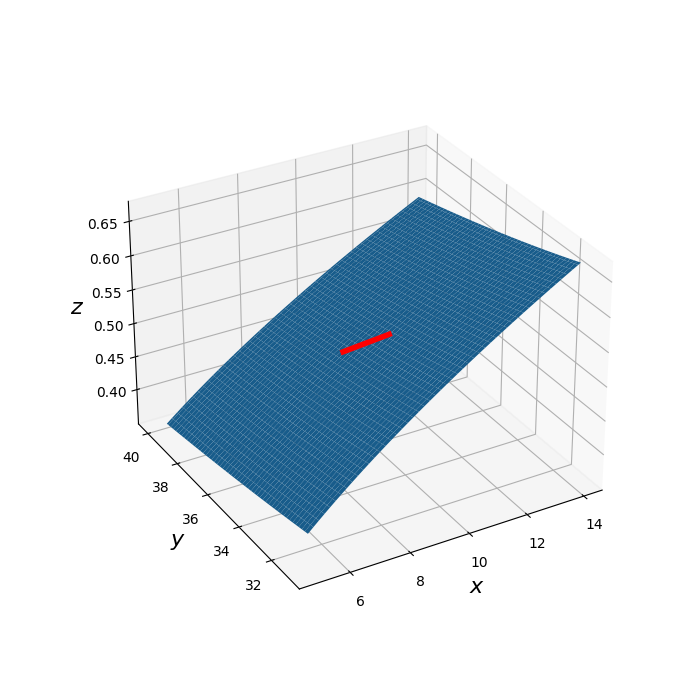

In [70]:
x = linspace(5,14,100)
y = linspace(31,40,100)
fig = plt.figure("2D solution", figsize=(7,7))
ax = fig.add_subplot(projection='3d')
x,y = meshgrid(x,y)
ax.plot_surface(x,y,sqrt(x/y))
ax.view_init(30,-120)
t = linspace(0,1,12)
ax.plot(9 + t, 36 - t, 1/2 + t/36 + t/144,'r',lw=4,zorder=6)
for c in "xyz":
    getattr(ax,f"set_{c}label")(f"${c}$",fontsize=16)

#### Solution

$g_x(x,y) = \frac{1}{2\sqrt{xy}}$

$g_x(9,36) = \frac{1}{36}$

$g_y(x,y) = -\frac{\sqrt{x}}{2y\sqrt{y}}$

$g_y(9,36) = -\frac{1}{144}$

$$L(x,y) = 1/2 + 1/36(x-9) -1/144(y-36)$$

In [71]:
# 1/2 + 1/36 + 1/144

In [72]:
# sqrt(2/7)

#### <p style="padding-bottom:40%;"> </p>

## Examples

### 3. Least bad

An aluminum can is cylindrical in shape with a height of 5 cm, a diameter of 6 cm, and is approximately .4 mm thick. Estimate the volume of aluminum used.

The volume of a cylinder is $V = \pi r^2 h$.

In [73]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    slider = FloatSlider(min=-.3,max=.3,step=.01, value=0)
    r = slider.value
                         
    x = linspace(-r,5 + r,10)
    y = linspace(0,2*pi,100)
    R,th = meshgrid(x,y)
    X = (3+r) * cos(th)
    Y = (3+r) * sin(th)
    Z = R

    ax.plot_surface(3*cos(th),3*sin(th),Z,alpha=.5, color='g')
    pl = ax.plot_surface(X,Y,Z,alpha=.5, color='purple')

    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(0,6)
    
    def update(change):
        ax.collections.pop()
        r = slider.value
        x = linspace(-r,5 + r,10)

        R,th = meshgrid(x,y)
        X = (3+r) * cos(th)
        Y = (3+r) * sin(th)
        Z = R
        pl = ax.plot_surface(X,Y,Z,alpha=.5, color='purple')
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A cylinder")

#### Solution

The volume of aluminum is the difference in Volume $\Delta V$ between the "outer" can and its "inner" contents.

$$\Delta V \approx dV = 2\pi r h\,dr + \pi r^2dh$$ 

In [74]:
# Estimate with differentials
2*pi*3*5*.04 + pi*3**2*.08

6.031857894892402

In [75]:
# Compute more precisely via Python
pi*3.02**2*5.04 - pi*2.98**2*4.96

6.03195842585734

#### 
<p style="padding-bottom:40%;"> </p>

### 4. Estimating error

The total resistance $R$ from a circuit with two resistors wired in parallel is given by $$\frac1R = \frac{1}{R_1} + \frac{1}{R_2}.$$ Suppose a $3\Omega$ and a $5\Omega$ resistor are wired in parallel. Use lineariztion to estimate the total error if each resistor has a relative error of 1%.  